# BFS vs DFS

**Breadth-First Search (BFS)** and **Depth-First Search (DFS)** are two fundamental algorithms used for traversing or searching tree or graph data structures.

### Key Differences

| Feature | BFS (Breadth-First Search) | DFS (Depth-First Search) |
| :--- | :--- | :--- |
| **Strategy** | Explores neighbor nodes first, before moving to the next level neighbors. (Level by level) | Explores as far as possible along each branch before backtracking. (Deep dive) |
| **Data Structure** | Uses a **Queue** (FIFO - First In First Out). | Uses a **Stack** (LIFO - Last In First Out) or Recursion. |
| **Pathfinding** | Good for finding the **shortest path** in unweighted graphs. | Not guaranteed to find the shortest path. |
| **Memory** | Can require more memory as it stores all nodes at the current level. | Generally requires less memory (proportional to the depth of the graph). |
| **Use Cases** | Shortest path, peer-to-peer networks, social networking sites (friends of friends). | Maze solving, topological sorting, detecting cycles. |

## Steps to Implement BFS (Breadth-First Search)

1.  **Initialize**:
    *   Create a `queue` and enqueue the starting node.
    *   Create a `visited` set to keep track of visited nodes and add the starting node to it.
2.  **Loop**: While the queue is not empty:
    *   **Dequeue** a node from the front of the queue.
    *   **Process** the node (e.g., print it).
    *   **Explore Neighbors**: For each unvisited neighbor of the current node:
        *   Mark it as visited.
        *   Enqueue it.
3.  **End**: When the queue is empty, the traversal is complete.

In [9]:
from collections import deque

def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)
    
    print("BFS Traversal:")
    while queue:
        vertex = queue.popleft() # Dequeue
        print(vertex, end=" ")   # Process
        
        # Explore neighbors
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    print()

# Example Graph (Adjacency List)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

bfs(graph, 'A')

BFS Traversal:
A B C D E F 


## Steps to Implement DFS (Depth-First Search)

1.  **Initialize**:
    *   Create a `visited` set to keep track of visited nodes.
    *   (Recursive approach is commonly used).
2.  **Recursive Function (node, visited)**:
    *   Mark the current `node` as visited.
    *   **Process** the node (e.g., print it).
    *   **Explore Neighbors**: For each neighbor of the current node:
        *   If the neighbor has not been visited, recursively call the function for that neighbor.
3.  **Start**: Call the recursive function with the starting node.

*(Note: DFS can also be implemented iteratively using a Stack)*

In [12]:
def sik_dfs(dicts, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=" ")
            
    for n in dicts[start]:
        if n not in visited:
            sik_dfs(dicts, n, visited)

sik_dfs(graph, 'A')

A B D E F C 

In [2]:
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    
    visited.add(node)
    print(node, end=" ") # Process
    
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

print("DFS Traversal:")
# Using the same graph from BFS example
dfs(graph, 'A')
print()

DFS Traversal:
A B D E F C 


# Grid Visualization (MxM)

Let's visualize how BFS and DFS explore a 2D grid. We will use a **heatmap** to represent the order in which nodes are visited.

*   **BFS** should look like a growing wave or diamond shape from the center.
*   **DFS** should look like a wandering path that goes deep into the grid before backtracking.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def bfs_grid(rows, cols, start_node):
    visited_order = np.zeros((rows, cols)) # To store the order of visitation
    visited = set()
    queue = deque([start_node])
    visited.add(start_node)
    
    
    step = 1
    visited_order[start_node] = step
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)] # Right, Down, Left, Up
    
    while queue:
        r, c = queue.popleft()
        
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in visited:
                visited.add((nr, nc))
                queue.append((nr, nc))
                step += 1
                visited_order[nr, nc] = step
                
    return visited_order

def dfs_grid(rows, cols, start_node):
    visited_order = np.zeros((rows, cols))
    visited = set()
    stack = [start_node]
    
    step = 0
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)] # Right, Down, Left, Up
    
    while stack:
        r, c = stack.pop()
        
        if (r, c) not in visited:
            visited.add((r, c))
            step += 1
            visited_order[r, c] = step
            
            # Add neighbors to stack
            # Reverse directions to explore in same order as BFS (Right, Down...) 
            # because Stack is LIFO
            for dr, dc in reversed(directions): 
                nr, nc = r + dr, c + dc
                if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in visited:
                    stack.append((nr, nc))
                    
    return visited_order

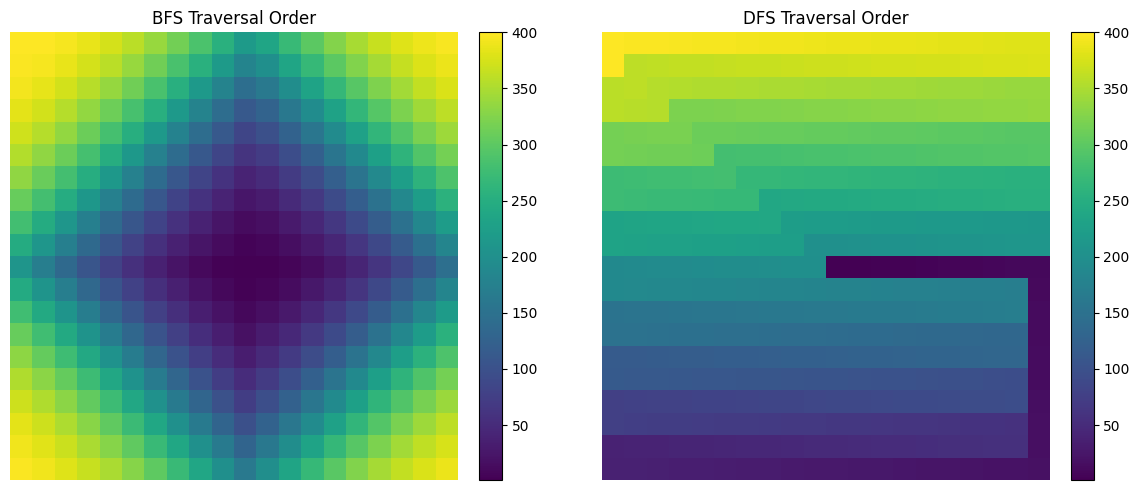

In [4]:
# Parameters
M = 20 # Grid size (20x20)
start_pos = (M//2, M//2) # Start in the middle

# Run Algorithms
bfs_result = bfs_grid(M, M, start_pos)
dfs_result = dfs_grid(M, M, start_pos)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot BFS
im1 = axes[0].imshow(bfs_result, cmap='viridis', origin='upper')
axes[0].set_title('BFS Traversal Order')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Plot DFS
im2 = axes[1].imshow(dfs_result, cmap='viridis', origin='upper')
axes[1].set_title('DFS Traversal Order')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## Animation

We can animate the traversal process to see it unfold step-by-step. We'll use `matplotlib.animation` for this.
*   We iterate through the "steps" recorded in our `visited_order` matrices.
*   At each frame, we reveal the nodes visited up to that step.

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Setup the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax_bfs, ax_dfs = axes

# Initial empty plots (using 0 for unvisited)
# We set vmin/vmax to ensure colors stay consistent as new values appear
max_val = max(np.max(bfs_result), np.max(dfs_result))
bfs_display = ax_bfs.imshow(np.zeros((M, M)), cmap='viridis', vmin=0, vmax=max_val)
dfs_display = ax_dfs.imshow(np.zeros((M, M)), cmap='viridis', vmin=0, vmax=max_val)

ax_bfs.set_title('BFS Animation')
ax_dfs.set_title('DFS Animation')
ax_bfs.axis('off')
ax_dfs.axis('off')

def update(frame):
    # BFS Update: Show cells visited up to current 'frame'
    bfs_data = bfs_result.copy()
    bfs_data[bfs_data > frame] = 0 # Hide future steps
    bfs_display.set_data(bfs_data)
    
    # DFS Update
    dfs_data = dfs_result.copy()
    dfs_data[dfs_data > frame] = 0 # Hide future steps
    dfs_display.set_data(dfs_data)
    
    return bfs_display, dfs_display

# Create animation
# frames: iterate from 0 to max_val. We skip steps (step=5) to make animation faster.
anim = FuncAnimation(fig, update, frames=range(0, int(max_val) + 1, 5), interval=30, blit=True)

plt.close() # Prevent static plot from showing up
HTML(anim.to_jshtml())

## Pathfinding: Finding the Shortest Path

To find the path between two specific points (Start and End), we need to modify our algorithms:
1.  **Stop Condition**: Stop searching as soon as we find the `End` node.
2.  **Path Reconstruction**: Keep track of the **parent** of each node (the node we came from). Once we reach the `End`, we can backtrack using the parents to reconstruct the path to the `Start`.

*   **BFS** guarantees the shortest path in an unweighted grid.
*   **DFS** does *not* guarantee the shortest path; it just finds *a* path.

In [6]:
def solve_path(rows, cols, start, end, algorithm='bfs'):
    visited_order = [] # List of nodes in order of visitation
    parent = {start: None}
    
    if algorithm == 'bfs':
        container = deque([start])
    else: # dfs
        container = [start]
        
    found = False
    
    while container:
        if algorithm == 'bfs':
            curr = container.popleft()
        else:
            curr = container.pop()
            
        visited_order.append(curr)
        
        if curr == end:
            found = True
            break
            
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        # For DFS, we might want to shuffle or change order to make it look more "random" or standard
        if algorithm == 'dfs':
             directions = list(reversed(directions))

        for dr, dc in directions:
            nr, nc = curr[0] + dr, curr[1] + dc
            if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in parent:
                parent[(nr, nc)] = curr
                container.append((nr, nc))
                
    # Reconstruct Path
    path = []
    if found:
        curr = end
        while curr:
            path.append(curr)
            curr = parent[curr]
        path.reverse()
        
    return visited_order, path

In [7]:
# Install ipywidgets if needed
# %pip install ipywidgets

%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Parameters
M = 20

# Widgets
sx_widget = widgets.IntSlider(value=2, min=0, max=M-1, description='Start X')
sy_widget = widgets.IntSlider(value=2, min=0, max=M-1, description='Start Y')
ex_widget = widgets.IntSlider(value=15, min=0, max=M-1, description='End X')
ey_widget = widgets.IntSlider(value=15, min=0, max=M-1, description='End Y')
button = widgets.Button(description="Animate Pathfinding", button_style='success')
output = widgets.Output()

print("Select Start and End points, then click 'Animate Pathfinding':")
display(widgets.VBox([
    widgets.HBox([sx_widget, sy_widget]),
    widgets.HBox([ex_widget, ey_widget]),
    button,
    output
]))

def on_click(b):
    with output:
        clear_output(wait=True)
        
        # Get coordinates (Note: Matrix is (row, col) -> (y, x))
        START = (sy_widget.value, sx_widget.value)
        END = (ey_widget.value, ex_widget.value)
        
        if START == END:
            print("Start and End cannot be the same!")
            return
            
        print(f"Calculating path from {START} to {END}...")
        
        # Run Algorithms (using the solve_path function defined earlier)
        bfs_visited, bfs_path = solve_path(M, M, START, END, 'bfs')
        dfs_visited, dfs_path = solve_path(M, M, START, END, 'dfs')
        
        print("Generating animation... (Please wait)")
        
        # Setup Animation
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        ax_bfs, ax_dfs = axes
        
        # Initialize Grids
        grid_bfs = np.zeros((M, M))
        grid_dfs = np.zeros((M, M))
        
        im_bfs = ax_bfs.imshow(grid_bfs, cmap='magma', vmin=0, vmax=2)
        im_dfs = ax_dfs.imshow(grid_dfs, cmap='magma', vmin=0, vmax=2)
        
        ax_bfs.set_title(f'BFS Steps: {len(bfs_visited)}')
        ax_dfs.set_title(f'DFS Steps: {len(dfs_visited)}')
        ax_bfs.axis('off')
        ax_dfs.axis('off')
        
        def update_path(frame):
            # BFS Logic
            if frame < len(bfs_visited):
                r, c = bfs_visited[frame]
                grid_bfs[r, c] = 0.5
            elif frame == len(bfs_visited): # Draw path once
                for r, c in bfs_path:
                    grid_bfs[r, c] = 1.5
                    
            # DFS Logic
            if frame < len(dfs_visited):
                r, c = dfs_visited[frame]
                grid_dfs[r, c] = 0.5
            elif frame == len(dfs_visited): # Draw path once
                for r, c in dfs_path:
                    grid_dfs[r, c] = 1.5
            
            # Markers
            grid_bfs[START] = 2; grid_bfs[END] = 2
            grid_dfs[START] = 2; grid_dfs[END] = 2
            
            im_bfs.set_data(grid_bfs)
            im_dfs.set_data(grid_dfs)
            return im_bfs, im_dfs
            
        max_frames = max(len(bfs_visited), len(dfs_visited)) + 5
        # Faster interval for interactive feel
        # Set blit=False for better compatibility if blit=True fails
        anim = FuncAnimation(fig, update_path, frames=range(0, max_frames, 2), interval=20, blit=False)
        
        plt.close()
        display(HTML(anim.to_jshtml()))
        print("Animation Ready!")

button.on_click(on_click)

Select Start and End points, then click 'Animate Pathfinding':


# Algorithm Comparison: Which is Best?

### Summary Table

| Algorithm | Type | Shortest Path? | Efficiency | Pros | Cons |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **BFS** | Uninformed | **Yes** (Unweighted) | Low | Guarantees shortest path. Simple to implement. | Slow. Explores *every* direction equally, even away from the target. High memory usage. |
| **DFS** | Uninformed | **No** | High (Memory) | Very memory efficient. Good for deep searches or maze generation. | Does not guarantee shortest path. Can get "lost" in deep paths. |
| **A* (A-Star)** | Informed | **Yes** | **High** | **The Gold Standard**. Fast and optimal. Uses a heuristic to guide search. | Slightly more complex to implement. Performance depends on the heuristic function. |

### Is there anything better?

It depends on the problem!

1.  **Dijkstra's Algorithm**:
    *   **Best for**: **Weighted Graphs** (e.g., maps with traffic, terrain costs).
    *   *Note*: BFS is actually just a special case of Dijkstra where all edge weights are 1. A* is an optimization of Dijkstra that uses a heuristic.

2.  **Bidirectional Search**:
    *   **Best for**: Large graphs where you know both Start and End.
    *   **How**: Runs two searches simultaneously—one from Start, one from End—and stops when they meet in the middle. This can drastically reduce the search area.

3.  **Jump Point Search (JPS)**:
    *   **Best for**: **Uniform-cost Grids** (like our example).
    *   **How**: An optimization of A* that "jumps" over empty spaces and only stops at "interesting" nodes (corners, obstacles). It is **much faster** than standard A* for open grids.

### Verdict
For general pathfinding on a grid or map (like in video games), **A* (A-Star)** is usually the best choice. If the map is huge and open, **Jump Point Search** is better. If edges have weights (traffic, hills), **Dijkstra** is the foundation.